Import modules:

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

np.set_printoptions(precision = 12, suppress = True, linewidth =120)
print(tf.__version__)

2.4.0


Data load:

In [9]:
(X_train,y_train),(X_test,y_test) = load_data()

11493376/11490434 [==============================] - 9s 1us/step


In [11]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [12]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [14]:
print(f'Shape of element: {X_train[0].shape}')

Shape of element: (28, 28)


Stadarize data:

In [15]:
X_train = X_train / 255
X_test = X_test / 255

Data exploration:

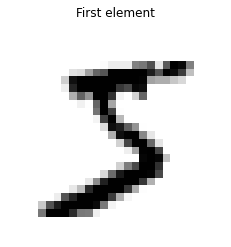

In [30]:
plt.imshow(X_train[0],cmap= 'gray_r')
plt.title('First element')
_= plt.axis('off')

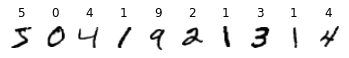

In [48]:
fig, axs = plt.subplots(1,10)

for i in range(0,10):
    axs[i].imshow(X_train[i],cmap= 'gray_r')
    axs[i].set_title(y_train[i])
    axs[i].set_axis_off()
    



Create model:

In [50]:
model = Sequential()

model.add(Flatten(input_shape = (28,28)))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 10, activation = 'softmax'))

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Model train:

In [61]:
history = model.fit(X_train,y_train,epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0386 - accuracy: 0.9869
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0390 - accuracy: 0.9870
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0364 - accuracy: 0.9876
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0341 - accuracy: 0.9887
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0319 - accuracy: 0.9893


Model mark:

In [62]:
model.evaluate(X_test,y_test,verbose=2)

313/313 - 0s - loss: 0.0745 - accuracy: 0.9812


[0.07451076060533524, 0.9811999797821045]

In [63]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.038621,0.986867
1,0.039002,0.987033
2,0.036444,0.987633
3,0.034132,0.988650
4,0.031876,0.989250


In [77]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(
    go.Scatter(x=metrics.index, y=metrics.loss,name = 'Loss'),
    row=1, col=1)

fig.add_trace(
    go.Scatter(x=metrics.index, y=metrics.accuracy,name = 'Accuracy'),
    row=2, col=1)

Model predict:

In [78]:
model.predict(X_test)

array([[0.000000002286, 0.000000000001, 0.00000002228 , ..., 0.99996245    , 0.000000000044, 0.000000043194],
       [0.            , 0.000000870856, 0.99999917    , ..., 0.            , 0.000000000002, 0.            ],
       [0.000000000494, 0.999997      , 0.000000138334, ..., 0.000002377135, 0.00000047319 , 0.00000000019 ],
       ...,
       [0.            , 0.000000000001, 0.            , ..., 0.000000000582, 0.000000000018, 0.000000279055],
       [0.            , 0.000000000004, 0.            , ..., 0.            , 0.000013107093, 0.            ],
       [0.            , 0.            , 0.            , ..., 0.            , 0.            , 0.            ]],
      dtype=float32)

In [80]:
y_pred = model.predict_classes(X_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

Comparsion of y predict and true:

In [87]:
compar = pd.DataFrame(data = y_test,columns= ['True'])
compar

,True
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [88]:
pred = pd.DataFrame(data = y_pred, columns= ['Predicted'])
pred

,Predicted
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [89]:
compar = pd.concat([compar,pred],axis = 1)
compar

,True,Predicted
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


In [90]:
misclassified = compar[compar['True'] != compar['Predicted']]
misclassified

,True,Predicted
18,3,8
151,9,8
247,4,2
321,2,7
340,5,3
...,...,...
9745,4,0
9768,2,0
9770,5,0
9839,2,3


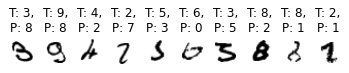

In [101]:
fig, axs = plt.subplots(1,10)

for i in range(0,10):
    axs[i].imshow(X_test[misclassified.index[i]],cmap= 'gray_r')
    axs[i].set_title(f'T: {y_test[misclassified.index[i]]},\n'
    f'P: {y_pred[misclassified.index[i]]}')
    axs[i].set_axis_off()


